In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
df = pd.read_csv("Customer_Segmented_Output.csv")

In [4]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Cluster'],
      dtype='object')


In [5]:
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[num_cols])

scaled_df = pd.DataFrame(scaled_data, columns=num_cols)

In [7]:
minmax = MinMaxScaler()
scaled_data = minmax.fit_transform(df[num_cols])

scaled_df = pd.DataFrame(scaled_data, columns=num_cols)

In [8]:
print(scaled_df.head())


    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.042940           1.000000   0.000326          0.000393   
4  0.095038           1.000000   0.027188          0.000000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.004240      0.000000             0.166667   
1                0.000000      0.136685             0.000000   
2                0.000000      0.000000             1.000000   
3                0.000000      0.000000             0.083333   
4                0.059257      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000      

In [9]:
#Apply K-Means Clustering

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [11]:
X = scaled_df.values

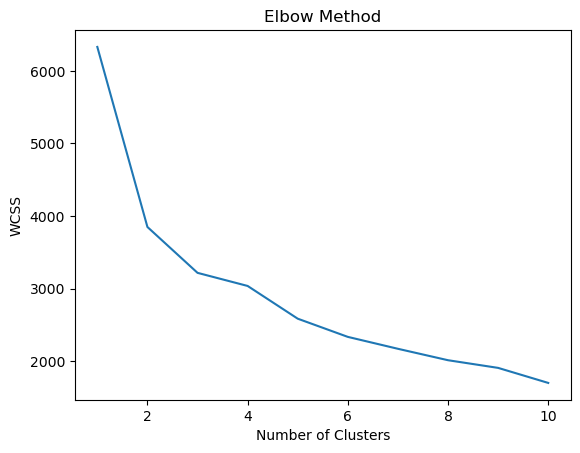

In [12]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

df['KMeans_Cluster'] = clusters

In [14]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,KMeans_Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1,2
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,1,0
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1,1


In [16]:
cluster_summary = df.groupby('KMeans_Cluster').mean(numeric_only=True)
print(cluster_summary)

                    BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
KMeans_Cluster                                                                  
0               1787.412575           0.853098   306.799016        249.227228   
1               1135.589603           0.923659   973.307430        229.744597   
2               1879.890310           0.977738  3477.798096       2485.106750   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
KMeans_Cluster                                                              
0                            57.717405   1399.607070             0.152753   
1                           744.321024    555.696427             0.859735   
2                           992.691346    503.196925             0.925963   

                ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
KMeans_Cluster                                                                 
0                                 0.092853      

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [19]:
#Apply Hierarchical Clustering

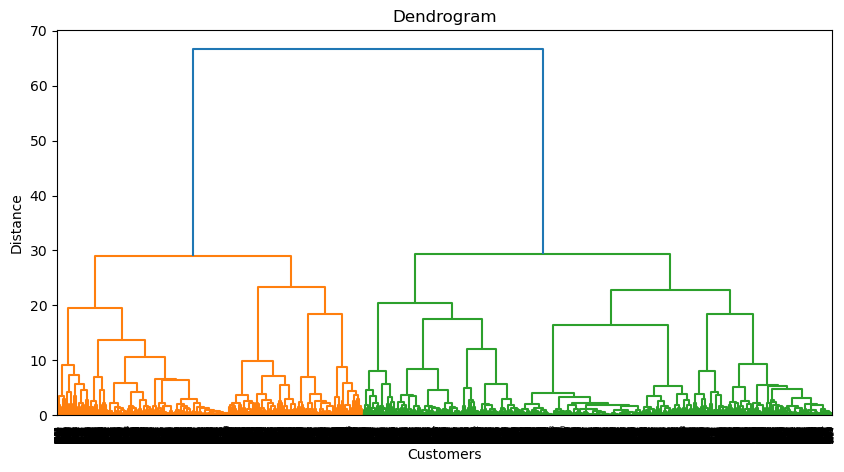

In [20]:
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [21]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_clusters = hc.fit_predict(X)

df['Hierarchical_Cluster'] = hc_clusters

In [22]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,KMeans_Cluster,Hierarchical_Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,1,0,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,0,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,1,2,2
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,1,0,1
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1,1,0


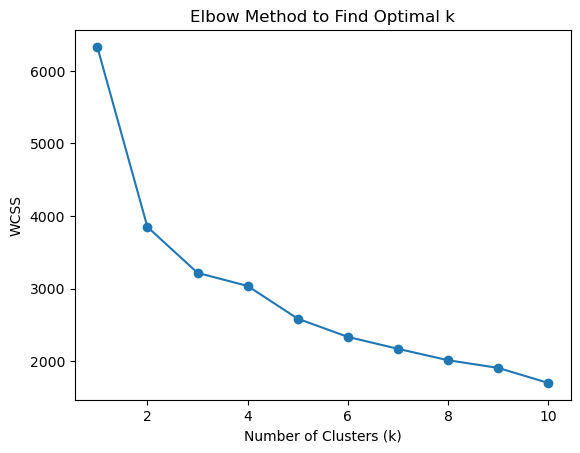

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = scaled_df.values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method to Find Optimal k")
plt.show()

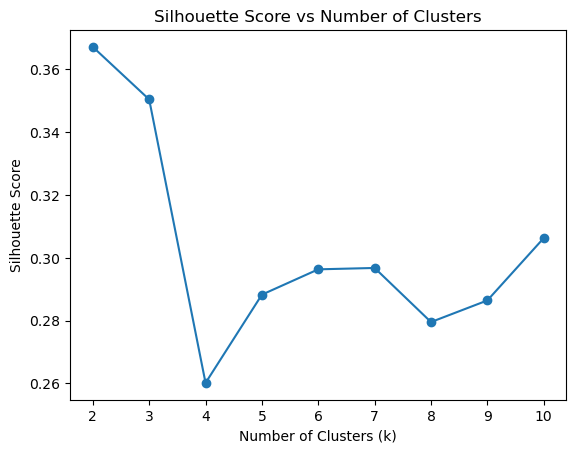

In [24]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [27]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

In [28]:
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

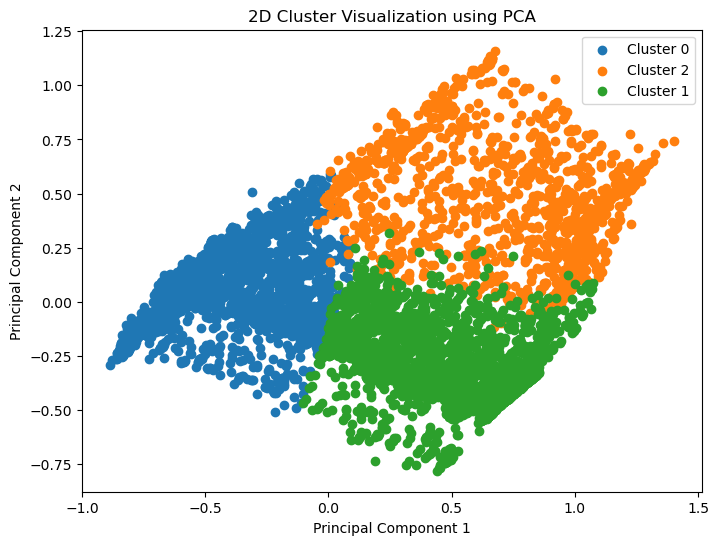

In [29]:
plt.figure(figsize=(8, 6))
for cluster in pca_df['Cluster'].unique():
    plt.scatter(
        pca_df[pca_df['Cluster'] == cluster]['PC1'],
        pca_df[pca_df['Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster}'
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Cluster Visualization using PCA')
plt.legend()
plt.show()

In [31]:
pca = PCA(n_components=3)
pca_data_3d = pca.fit_transform(X)

In [32]:
pca_3d_df = pd.DataFrame(pca_data_3d, columns=['PC1', 'PC2', 'PC3'])
pca_3d_df['Cluster'] = df['Cluster']

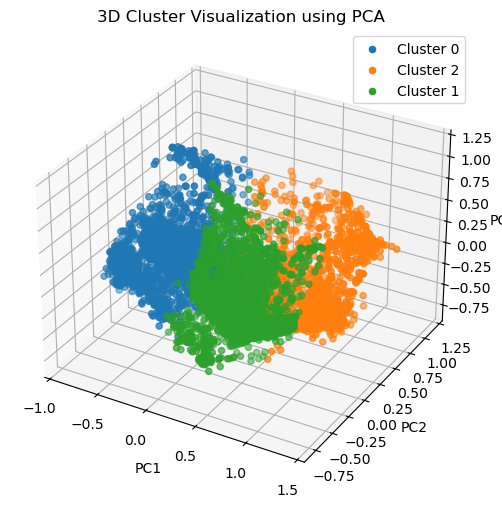

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for cluster in pca_3d_df['Cluster'].unique():
    ax.scatter(
        pca_3d_df[pca_3d_df['Cluster'] == cluster]['PC1'],
        pca_3d_df[pca_3d_df['Cluster'] == cluster]['PC2'],
        pca_3d_df[pca_3d_df['Cluster'] == cluster]['PC3'],
        label=f'Cluster {cluster}'
    )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Cluster Visualization using PCA')
ax.legend()
plt.show()

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = tsne.fit_transform(X)

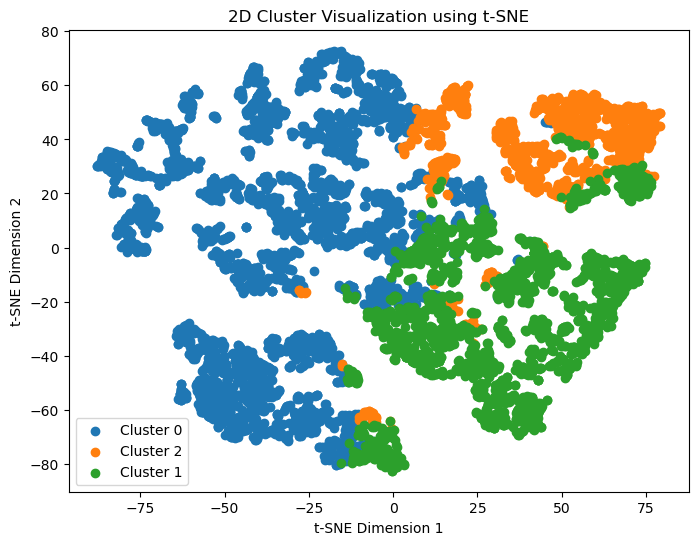

In [36]:
tsne_df = pd.DataFrame(tsne_data, columns=['Dim1', 'Dim2'])
tsne_df['Cluster'] = df['Cluster']

plt.figure(figsize=(8, 6))
for cluster in tsne_df['Cluster'].unique():
    plt.scatter(
        tsne_df[tsne_df['Cluster'] == cluster]['Dim1'],
        tsne_df[tsne_df['Cluster'] == cluster]['Dim2'],
        label=f'Cluster {cluster}'
    )

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('2D Cluster Visualization using t-SNE')
plt.legend()
plt.show()

In [38]:
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_profile)

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        1787.412575           0.853098   306.799016        249.227228   
1        1135.589603           0.923659   973.307430        229.744597   
2        1879.890310           0.977738  3477.798096       2485.106750   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                     57.717405   1399.607070             0.152753   
1                    744.321024    555.696427             0.859735   
2                    992.691346    503.196925             0.925963   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.092853                          0.059761   
1                          0.092863                        

In [40]:
overall_avg = df.mean(numeric_only=True)
print(overall_avg)

BALANCE                             1601.224893
BALANCE_FREQUENCY                      0.895035
PURCHASES                           1025.433874
ONEOFF_PURCHASES                     604.901438
INSTALLMENTS_PURCHASES               420.843533
CASH_ADVANCE                         994.175523
PURCHASES_FREQUENCY                    0.496000
ONEOFF_PURCHASES_FREQUENCY             0.205909
PURCHASES_INSTALLMENTS_FREQUENCY       0.368820
CASH_ADVANCE_FREQUENCY                 0.137604
CASH_ADVANCE_TRX                       3.313918
PURCHASES_TRX                         15.033233
CREDIT_LIMIT                        4522.091030
PAYMENTS                            1784.478099
MINIMUM_PAYMENTS                     864.304943
PRC_FULL_PAYMENT                       0.159304
TENURE                                11.534391
Cluster                                0.632121
KMeans_Cluster                         0.632121
Hierarchical_Cluster                   0.807550
dtype: float64


In [41]:
cluster_labels = {
    0: "High-Value Customers",
    1: "Bargain Seekers",
    2: "Low Engagement Customers"
}

df['Customer_Segment'] = df['Cluster'].map(cluster_labels)

In [42]:
df[['Cluster', 'Customer_Segment']].head()

,Cluster,Customer_Segment
0,0,High-Value Customers
1,0,High-Value Customers
2,2,Low Engagement Customers
3,0,High-Value Customers
4,1,Bargain Seekers
